In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
pd.options.display.float_format = "{:.0f}".format

# to print out all the outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("./data/buyrent_properties_2021.10.27.csv")

In [3]:
data.head()

,property_title,property_location,property_area,property_bedrooms,property_bathrooms,property_description,property_agent,property_price
0,\n4 ac land for sale in Kilimani\n,"\n\nArgwing Kodhek, Kilimani, Dagoretti North\n\n",\n4 ac\n,-,-,\n4 ac land for Sale in Kilimani\n,-,"\nKSh 1,600,000,000\n"
1,\n1 bedroom apartment for sale in Westlands Area\n,"\n\n4Th Parklands Avenue, Westlands Area, Westlands\n\n",-,\n1\n,\n\n\n\n\n\n\n\n\n1\n\n,\nPRIMO PARK 1 & 3 BED APARTMENTS IN PARKLANDS -...\n,Primofort Investment,"\nKSh 8,000,000\n"
2,\n2 bedroom apartment for sale in Kilimani\n,"\n\nOff kinadaruma road, Kilimani, Dagoretti North\n\n",\n120 m²\n,\n2\n,\n\n\n\n\n\n\n\n\n3\n\n,\n2 BEDROOMS APARTMENT FOR SALE IN KILIMANI\n,Abode Realty,"\nKSh 11,000,000\n"
3,\n3 bedroom apartment for sale in Kilimani\n,"\n\nKayahwe road, Kilimani, Dagoretti North\n\n",\n120 m²\n,\n3\n,\n\n\n\n\n\n\n\n\n2\n\n,\n3 BEDROOM APARTMENT FOR SALE IN KILIMANI\n,Abode Realty,"\nKSh 10,500,000\n"
4,\n2 bedroom apartment for sale in Kilimani\n,"\n\nKindaruma road, Kilimani, Dagoretti North\n\n",\n100 m²\n,\n2\n,\n\n\n\n\n\n\n\n\n2\n\n,\n2 bedroom apartment in kilimani\n,Abode Realty,"\nKSh 7,500,000\n"


In [4]:
#columns cleaning
def column_cleaner(df,column):
    df[column] =  df[column].map(lambda x: x.lstrip('\n').rstrip('\n').lstrip())
    return df

In [5]:
data.columns

Index(['property_title', 'property_location', 'property_area',
       'property_bedrooms', 'property_bathrooms', 'property_description',
       'property_agent', 'property_price'],
      dtype='object')

In [6]:
col = ['property_title', 'property_location', 'property_area',
       'property_bedrooms', 'property_bathrooms', 'property_description', 'property_price']

for column in col :
    data= column_cleaner(data,column)

In [7]:
data.head()

,property_title,property_location,property_area,property_bedrooms,property_bathrooms,property_description,property_agent,property_price
0,4 ac land for sale in Kilimani,"Argwing Kodhek, Kilimani, Dagoretti North",4 ac,-,-,4 ac land for Sale in Kilimani,-,"KSh 1,600,000,000"
1,1 bedroom apartment for sale in Westlands Area,"4Th Parklands Avenue, Westlands Area, Westlands",-,1,1,PRIMO PARK 1 & 3 BED APARTMENTS IN PARKLANDS -...,Primofort Investment,"KSh 8,000,000"
2,2 bedroom apartment for sale in Kilimani,"Off kinadaruma road, Kilimani, Dagoretti North",120 m²,2,3,2 BEDROOMS APARTMENT FOR SALE IN KILIMANI,Abode Realty,"KSh 11,000,000"
3,3 bedroom apartment for sale in Kilimani,"Kayahwe road, Kilimani, Dagoretti North",120 m²,3,2,3 BEDROOM APARTMENT FOR SALE IN KILIMANI,Abode Realty,"KSh 10,500,000"
4,2 bedroom apartment for sale in Kilimani,"Kindaruma road, Kilimani, Dagoretti North",100 m²,2,2,2 bedroom apartment in kilimani,Abode Realty,"KSh 7,500,000"


In [8]:
#remove specific
data['property_price_currency'] = data.property_price.str.split(' ').str[0]
data['property_price_amount'] = data.property_price.str.split(' ').str[1]

#convert amount to integers
data['property_price_amount'] = data['property_price_amount'].str.replace(',', '')
data['property_price_amount'] = data['property_price_amount'].str.replace('\n', '').astype(float)
data.head()

,property_title,property_location,property_area,property_bedrooms,property_bathrooms,property_description,property_agent,property_price,property_price_currency,property_price_amount
0,4 ac land for sale in Kilimani,"Argwing Kodhek, Kilimani, Dagoretti North",4 ac,-,-,4 ac land for Sale in Kilimani,-,"KSh 1,600,000,000",KSh,1600000000
1,1 bedroom apartment for sale in Westlands Area,"4Th Parklands Avenue, Westlands Area, Westlands",-,1,1,PRIMO PARK 1 & 3 BED APARTMENTS IN PARKLANDS -...,Primofort Investment,"KSh 8,000,000",KSh,8000000
2,2 bedroom apartment for sale in Kilimani,"Off kinadaruma road, Kilimani, Dagoretti North",120 m²,2,3,2 BEDROOMS APARTMENT FOR SALE IN KILIMANI,Abode Realty,"KSh 11,000,000",KSh,11000000
3,3 bedroom apartment for sale in Kilimani,"Kayahwe road, Kilimani, Dagoretti North",120 m²,3,2,3 BEDROOM APARTMENT FOR SALE IN KILIMANI,Abode Realty,"KSh 10,500,000",KSh,10500000
4,2 bedroom apartment for sale in Kilimani,"Kindaruma road, Kilimani, Dagoretti North",100 m²,2,2,2 bedroom apartment in kilimani,Abode Realty,"KSh 7,500,000",KSh,7500000


In [9]:
data.dtypes

property_title             object 
property_location          object 
property_area              object 
property_bedrooms          object 
property_bathrooms         object 
property_description       object 
property_agent             object 
property_price             object 
property_price_currency    object 
property_price_amount      float64
dtype: object

In [10]:
#drop properties with price <1000
data = data.loc[data['property_price_amount']>=1000]
data.shape

(3707, 10)

In [11]:
# analysis of product distribution by agent
agg_agent_df = data.groupby('property_agent').agg({'property_price_amount':['count','min','max','mean']})
agg_agent_df.columns = ['_'.join(col).strip(' sum') for col in agg_agent_df.columns.values]
agg_agent_df= agg_agent_df.reset_index()

#drop row with missing agent name
agg_agent_df = agg_agent_df.loc[agg_agent_df['property_agent']!= '-']

#sorting the properties in descending order
agg_agent_df = agg_agent_df.sort_values(by='property_price_amount_count', ascending = False)

agg_agent_df.head()

,property_agent,property_price_amount_count,property_price_amount_min,property_price_amount_max,property_price_amount_mean
43,Coral Property International Ltd,143,5375,900000000,68987885
200,Splendor Holdings,134,3000000,350000000,40140299
148,Pam Golding Properties,119,8500000,650000000,66731792
45,Crystal Valuers LTD,93,8500,285000000,25192995
6,Abode Realty,80,3900000,100000000,16182375


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Top 20 Property Agents in the Nairobi per No. of Properties listed on www.buyrent.com Kenya')

Text(0.5, 0, 'No. of Properties')

Text(0, 0.5, 'Agent')

[Text(0, 0, 'Coral Property International Ltd'),
 Text(0, 1, 'Splendor Holdings'),
 Text(0, 2, 'Pam Golding Properties'),
 Text(0, 3, 'Crystal Valuers LTD'),
 Text(0, 4, 'Abode Realty'),
 Text(0, 5, 'Simkar Group Limited'),
 Text(0, 6, 'Sir Francis Marketing & Consultants Ltd'),
 Text(0, 7, 'Sky Limits Ventures'),
 Text(0, 8, 'Tysons Limited'),
 Text(0, 9, 'Azizi Realtors'),
 Text(0, 10, 'Balis Properties'),
 Text(0, 11, 'A1 Properties Ltd'),
 Text(0, 12, 'Wilnas Property Ltd'),
 Text(0, 13, 'Kenya Classic Homes'),
 Text(0, 14, 'Olympia Gold Real Estate'),
 Text(0, 15, 'Afrique Properties Limited'),
 Text(0, 16, 'Ace Realtors Limited'),
 Text(0, 17, 'Canaan Properties'),
 Text(0, 18, 'Ring Kenya Ltd'),
 Text(0, 19, 'PMC Estates Limited')]

Text(5, 0, '143')

Text(5, 0, '134')

Text(5, 0, '119')

Text(5, 0, '93')

Text(5, 0, '80')

Text(5, 0, '79')

Text(5, 0, '73')

Text(5, 0, '66')

Text(5, 0, '62')

Text(5, 0, '57')

Text(5, 0, '57')

Text(5, 0, '55')

Text(5, 0, '53')

Text(5, 0, '51')

Text(5, 0, '49')

Text(5, 0, '42')

Text(5, 0, '41')

Text(5, 0, '41')

Text(5, 0, '38')

Text(5, 0, '38')

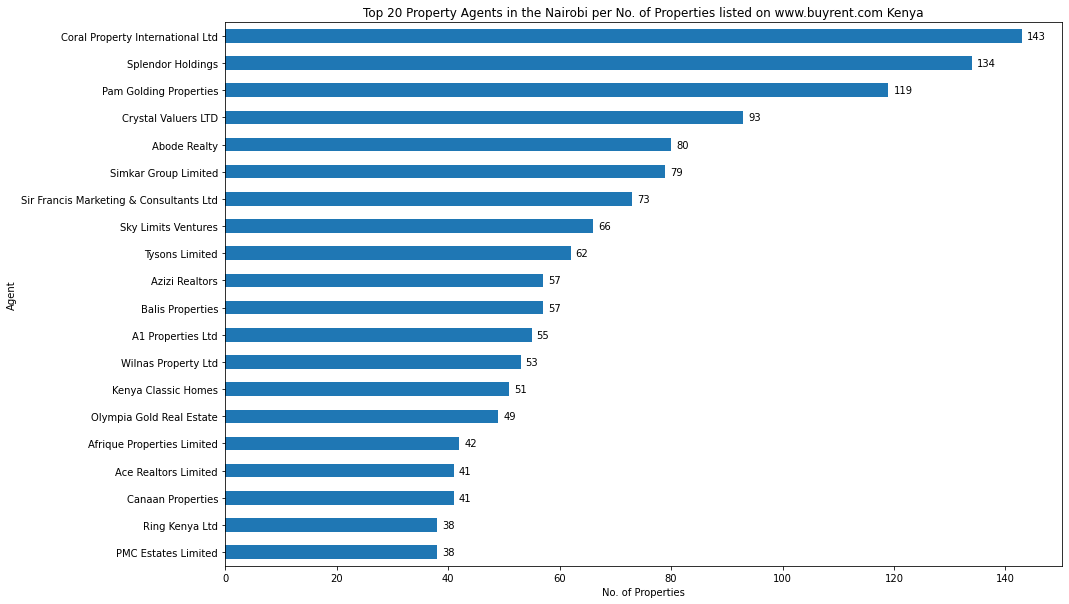

In [14]:
#top 20 agents
agent_ = agg_agent_df.head(20)

# Bring some raw data.
frequencies = agent_['property_price_amount_count']

# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
#freq_series = pd.Series.from_array(frequencies)

y_labels = agent_['property_agent']

# Plot the figure.
plt.figure(figsize=(15, 10))
ax = frequencies.plot(kind='barh')
ax.invert_yaxis()
ax.set_title('Top 20 Property Agents in the Nairobi per No. of Properties listed on www.buyrent.com Kenya')
ax.set_xlabel('No. of Properties')
ax.set_ylabel('Agent')
ax.set_yticklabels(y_labels)
#ax.set_xlim(0, 300) # expand xlim to make labels easier to read

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    
      # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.

plt.savefig("./data/agents_distribution.png")

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Top 20 Property Agents in the Nairobi per Average Price as listed on www.buyrent.com Kenya')

Text(0.5, 0, 'Avg. Property Prices')

Text(0, 0.5, 'Agent')

[Text(0, 0, 'LYNDUM ENTERPRISES'),
 Text(0, 1, 'Jafari Homes Limited'),
 Text(0, 2, 'Tidetwo Enterprises'),
 Text(0, 3, 'Badilisha Properties'),
 Text(0, 4, 'Property Zone East Africa'),
 Text(0, 5, 'HAMMOCK & PALMS AFRICA'),
 Text(0, 6, 'Jubilee Real Estate'),
 Text(0, 7, 'Apricot Property Solutions Limited'),
 Text(0, 8, 'Standard Shelters Limited'),
 Text(0, 9, 'Pinder Bassi'),
 Text(0, 10, 'Highmack Enterprises'),
 Text(0, 11, 'Mimshakh Dunamis Global Ltd'),
 Text(0, 12, 'Homefront Consult'),
 Text(0, 13, 'Eden Heights Realty'),
 Text(0, 14, 'Lyons Properties'),
 Text(0, 15, 'Riverdale Properties'),
 Text(0, 16, 'GerryVille Homes'),
 Text(0, 17, 'Henley Green Realty'),
 Text(0, 18, 'Newpoint Properties'),
 Text(0, 19, 'Fit Property')]

Text(5, 0, '357000000')

Text(5, 0, '320000000')

Text(5, 0, '317500000')

Text(5, 0, '273100000')

Text(5, 0, '272216667')

Text(5, 0, '230833333')

Text(5, 0, '224692308')

Text(5, 0, '223500000')

Text(5, 0, '222250000')

Text(5, 0, '200642857')

Text(5, 0, '196000000')

Text(5, 0, '177500000')

Text(5, 0, '160000000')

Text(5, 0, '156700000')

Text(5, 0, '148300000')

Text(5, 0, '147500000')

Text(5, 0, '145426667')

Text(5, 0, '143500000')

Text(5, 0, '132571429')

Text(5, 0, '132111111')

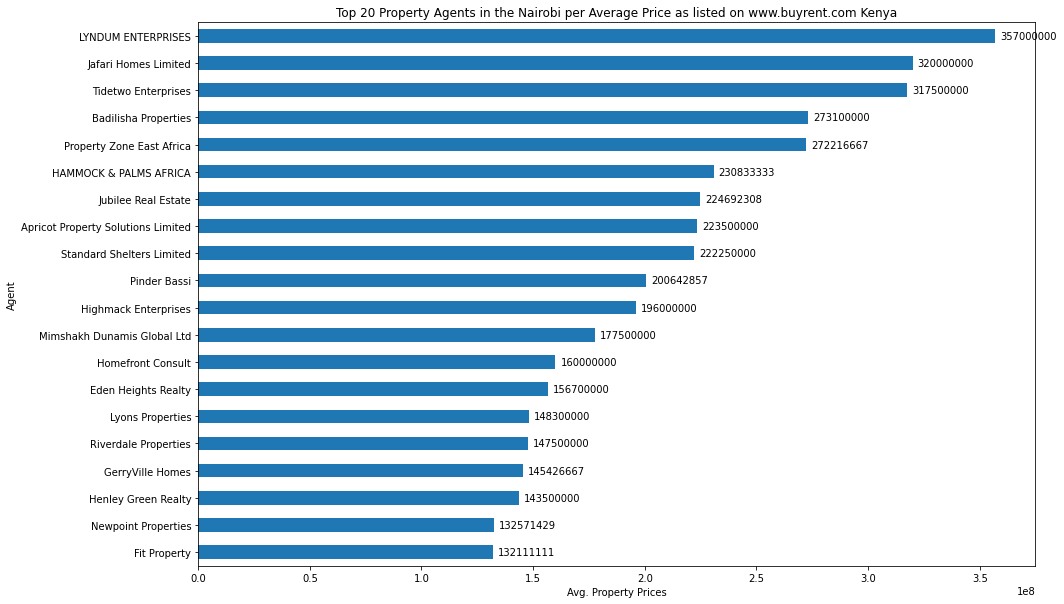

In [15]:
#sorting the properties in descending order
agg_agent_df = agg_agent_df.sort_values(by='property_price_amount_mean', ascending = False)

#top 20 agents
agent_ = agg_agent_df.head(20)

# Bring some raw data.
frequencies = agent_['property_price_amount_mean']

# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
#freq_series = pd.Series.from_array(frequencies)

y_labels = agent_['property_agent']

# Plot the figure.
plt.figure(figsize=(15, 10))
ax = frequencies.plot(kind='barh')
ax.invert_yaxis()
ax.set_title('Top 20 Property Agents in the Nairobi per Average Price as listed on www.buyrent.com Kenya')
ax.set_xlabel('Avg. Property Prices')
ax.set_ylabel('Agent')
ax.set_yticklabels(y_labels)
#ax.set_xlim(0, 300) # expand xlim to make labels easier to read

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    
      # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.

plt.savefig("./data/agents_distribution_per_avg_price.png")